# Exploratory Analysis with Linear Regressions

The relationship between the temp. and  the Humidity

Renad Al-khlafat
26/10/2021

In [194]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Load the data you receive into a Pandas DataFrame.

In [195]:
weather_data = pd.read_csv("weatherHistory.csv")
# weather_data = weather_data[["Wind Speed (km/h)","Visibility (km)"]]
weather_data

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


## Show the first five rows of the data set.

In [196]:
wind_and_visibiltiy_data =weather_data[["Temperature (C)","Humidity"]].head()
wind_and_visibiltiy_data

,Temperature (C),Humidity
0,9.472222,0.89
1,9.355556,0.86
2,9.377778,0.89
3,8.288889,0.83
4,8.755556,0.83


## Show the description and the info of the data set.

In [197]:
wind_and_visibiltiy_data.describe()

,Temperature (C),Humidity
count,5.000000,5.00
mean,9.050000,0.86
std,0.511141,0.03
min,8.288889,0.83
25%,8.755556,0.83
50%,9.355556,0.86
75%,9.377778,0.89
max,9.472222,0.89


In [198]:
wind_and_visibiltiy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Temperature (C)  5 non-null      float64
 1   Humidity         5 non-null      float64
dtypes: float64(2)
memory usage: 208.0 bytes


## Using a regression model, split your data into train and test data.

In [199]:
X = weather_data["Temperature (C)"].values
y = weather_data["Humidity"].values
X

array([ 9.47222222,  9.35555556,  9.37777778, ..., 22.03888889,
       21.52222222, 20.43888889])

In [200]:
# y=y.reshape(-1,1)
y

array([0.89, 0.86, 0.89, ..., 0.56, 0.6 , 0.61])

In [201]:
X=X.reshape(-1,1)
X

array([[ 9.47222222],
       [ 9.35555556],
       [ 9.37777778],
       ...,
       [22.03888889],
       [21.52222222],
       [20.43888889]])

## Fit your training split to the regression model.

In [202]:
x_train, x_test, y_train, y_test = train_test_split(X,y,train_size=0.6,test_size=0.4,random_state=100)
print(f"X_train shape {x_train.shape}")
print(f"y_train shape {y_train.shape}")
print(f"X_test shape {x_test.shape}")
print(f"y_test shape {y_test.shape}")
print(y_test)

X_train shape (57871, 1)
y_train shape (57871,)
X_test shape (38582, 1)
y_test shape (38582,)
[0.76 0.61 0.96 ... 0.86 0.59 0.8 ]


In [204]:
lm = LinearRegression()
lm.fit(x_train,y_train)
y_predict = lm.predict(x_test)
print(f"Train accuracy {round(lm.score(x_train,y_train)*100,2)} %")
print(f"Test accuracy {round(lm.score(x_test,y_test)*100,2)} %")

Train accuracy 40.11 %
Test accuracy 39.77 %


## Draw at least three conclusions from your regression model.

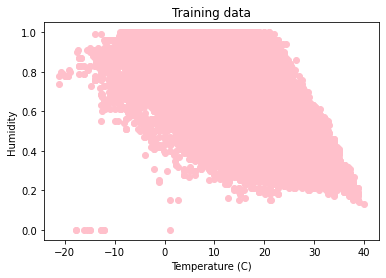

In [209]:
%matplotlib inline
plt.scatter(x_train,y_train,color='pink')
plt.xlabel('Temperature (C)')
plt.ylabel('Humidity')
plt.title('Training data')
plt.show()

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

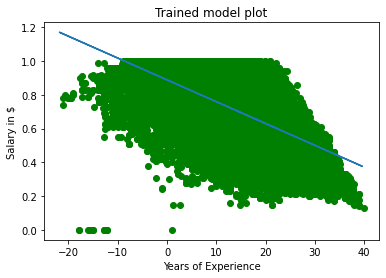

In [211]:
plt.scatter(x_train,y_train,color='green')
plt.plot(x_test,y_predict)
plt.xlabel("Temperature (C)")
plt.ylabel("Humidity")
plt.title("Trained model plot")
plt.plot

1. When the Temperature increased the Humidity it will increase
2. When the Temperature decreased the Humidity it will decrease
3. There is a relationship between Temperature and  the Humidity